<font face="Courier New">

# TensorFlow 实战 Goole 深度学习框架

# 一 Tensorflow 入门

## 1.1 TensorFlow 计算模型

### 1.1.1 TensorFlow 计算模型 - 计算图 Graph<br>
<font face="Courier New">

Tensorflow 计算模型 -- 计算图: Tensorflow 所有的计算都会被转化为计算图上的节点

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
g1 = tf.Graph()
with g1.as_default():
    # 在计算图g1中定义变量"v", 并设置初始值为0
    v = tf.get_variable("v", initializer=tf.zeros(shape=[1]))

g2 = tf.Graph()
with g2.as_default():
    # 在计算图g1中定义变量"v", 并设置初始值为1
    v = tf.get_variable("v", initializer=tf.ones(shape=[1]))

with tf.Session(graph=g1) as sess:
    tf.global_variables_initializer().run()
    with tf.variable_scope("", reuse=True):
        print(sess.run(tf.get_variable("v")))

with tf.Session(graph=g2) as sess:
    tf.global_variables_initializer().run()
    with tf.variable_scope("", reuse=True):
        print(sess.run(tf.get_variable("v")))

# g = tf.Graph()
# 指定计算运行的设备(本设备安装的并非gpu版本, 不可用  )
# with g.device('/gpu:0'):
#    a = tf.constant([1.0, 2.0], name="a")
#    b = tf.constant([2.0, 3.0], name="b")
#    result = a + b
#    with tf.Session(graph=g) as sess:
#        print(sess.run(result))

[0.]
[1.]


### 1.1.2 Tensorflow 数据模型 -- 张量 Tensor (TensorfFlow 的核心)<br>
<font face="Courier New">

张量是 Tensorflow 管理数据的形式, 在 Tensorflow 中所有的数据都通过张量的形式来时组织的.<br><br>
其中零阶张量表示标量(scalar), 也就是一个数; 第一阶张量为向量(vector), 也就是一个数组; 第n阶张量可以理解为一个n维数组. 但张量在 Tensorflow 中的实现并不是直接采用数组的形式, 它只是对 Tensorflow 中运算结果的引用. 在张量中并没有真正保存数字, 它保存的是如何得到这些数字的计算过程.

In [3]:
# tf.constant 是一个计算, 这个计算的输出结果就是一个张量
# 此处将张量保存在变量 a 中, 所以变量是一种特殊的张量
a = tf.constant([1.0, 2.0], name="a")
b = tf.constant([2.0, 3.0], name="b")
result = tf.add(a, b, name="add")
print(result)

Tensor("add:0", shape=(2,), dtype=float32)


<font face="Courier New">

从结果看出, 一个张量主要保存了三个属性:  
1.名字(name)  其中"add"为节点的名称, "0" 表示当前张量来自节点的第几个输出  
2.维度(shape) 该属性描述了一个张量的维度信息  
3.类型(type)  每一个张量都有唯一一个类型

### 1.1.3 Tensorflow 运行模型 -- 会话 session
<font face="Courier New">

Tensorflow 中的会话(Session)用来执行定义好的运算  
当默认的回话被指定之后可以通过 `tf.Tensor.eval` 函数来计算一个张量的取值, 以下代码展示了通过设定默认回话计算张量的取值.

In [4]:
a = tf.constant([1.0, 2.0], name="a")
b = tf.constant([2.0, 3.0], name="b")
result = tf.add(a, b, name="add")

sess = tf.Session()
with sess.as_default():
    print(result.eval())

# 以下代码也实现相同的功能:
with tf.Session() as sess:
    print(sess.run(result))
    print(result.eval(session=sess))

# tf.InteractiveSession 这个函数会自动将生成的会话注册为默认会话, 下面使用法:
sess = tf.InteractiveSession()
print(result.eval())
sess.close()

[3. 5.]
[3. 5.]
[3. 5.]
[3. 5.]


## 1.2 神经网络参数与 TensorFlow 变量

### 1.2.1 TensorFlow 随机数生成函数 (表)
<font face="Courier New">

函数名称         |    随机数分布     |      主要参数
---------------|---------------|:---------------
`tf.random_normal`|      正态分布    |shape: 输出张量的形状，必选.<br>mean: 正态分布的均值，默认为0<br>stddev: 正态分布的标准差，默认为1.0<br>dtype: 输出的类型，默认为tf.float32<br>seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样  
`tf.truncated_normal`| 正太分布, 但如果随机出来的值偏离平均值超过2个标准差<br>那么这个数将会被重新随机生成|shape: 输出张量的形状，必选.<br>mean: 正态分布的均值，默认为0<br>stddev: 正态分布的标准差，默认为1.0<br>dtype: 输出的类型，默认为tf.float32
`tf.random_uniform`|平均分布|最小 minval, 最大取值 maxval, 取值类型 dtype
`tf.random_gamma`|Gamma 分布|形状参数 alpha, 尺度参数 beta, 取值类型 dtype

In [5]:
# 声明一个 2x3 的矩阵变量, 矩阵的元素均是 0, 标准差 stddev=2 的随机数. 还可以使用 mean 来指定平均值!
weight = tf.Variable(tf.random_normal([2, 3], stddev=2))
with tf.Session() as sess:
    print(weight)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32_ref>


### 1.2.2 TensorFlow 常数生成函数 (表)
<font face="Courier New">

函数名称         |    功能     |      样例
---------------|---------------|:---------------
`tf.zeros`|产生全0的数组|`tf.zeros([2,3],int32)->[[0,0,0],[0,0,0]]`
`tf.ones`|产生全1的数组|`tf.ones([2,3],int32)->[[1,1,1],[1,1,1]]`
`tf.fill`|产生一个全部为给定数字的数组|`tf.fill([2,3],9)->[[9,9,9],[9,9,9]]`
`tf.constant`|产生一个给定值的常量|`tf.constant([1,2,3])->[1,2,3]`

In [6]:
zero = tf.zeros(shape=(2, 3), dtype=tf.int32)
print(zero)

Tensor("zeros:0", shape=(2, 3), dtype=int32)


### 1.2.3 TensorFlow 也支持通过其他变量的初始值来初始化新的变量

In [7]:
# w2 的初始值被设置成了与 weights 变量相同
# w3 的初始值则是 weights 初始值的两倍
# 在 TensorFLow 中, 一个变量的值在被使用之前, 这个变量的初始化过程需要被明确的调用
weights = tf.Variable(tf.random_normal([2, 3], stddev=2))
w2 = tf.Variable(weights.initialized_value())
w3 = tf.Variable(weights.initialized_value() * 2.0)

### 1.2.4 通过变量实现神经网络的参数并实现前向传播的过程

In [8]:
import tensorflow as tf

# 声明 w1, w2 两个变量. 这里还通过 seed 参数设定了随机种子.
# 这样可以保证每次运行得到的结果是一样的.
w1 = tf.Variable(tf.random_normal(shape=(2, 3), stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal(shape=(3, 1), stddev=1, seed=1))

# 暂时将输入的特征向量定义为一个常量, 注意这里 x 是一个 1*2 的矩阵
x = tf.constant([[0.7, 0.9]])

a = tf.matmul(x, w1)
y = tf.matmul(a, w2)

# 使用该函数可以初始化所有变量, 它也会自动处理变量之间的依赖关系
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(a))
    print(sess.run(y))

[[-2.7663565   1.1285427   0.57783246]]
[[3.957578]]


## 1.3 通过 TensorFlow 训练神经网络模型

<font face="Courier New">
    
**监督学习最重要的思想就是:** 在已知答案的标注数据集上, 模型给出的预测结果要尽量接近真实的答案. 通过调整神经网络中的参数对训练数据进行拟合, 可以使得模型对未知的样本提供预测的能力.<br><br>
在神经网络优化算法中, 最常用的方法就是**反向传播算法!**<br><br>
反向传播算法实现了一个迭代的过程, 在每次迭代的开始, 首先需要取一小部分训练数据, 这一小部分数据叫做 batch. 在上述示例中尝试使用常量来表达一个样例.<br>
`x = tf.constant([[0.7, 0.9]])`<br>
但如果每轮迭代中选取的数据都用常量表示, 那么 TensorFlow 的计算图将会太大. 为了避免这个问题, TensorFlow 提供了 placeholder 机制用于提供输入数据. **placeholder 相当于定义了一个位置, 这个位置中的数据在程序运行时再指定.** 这样程序在运行中就不要要大量的常量来提供数据.

### 1.3.1 下面通过 placeholder 实现前向传播算法(1)

In [9]:
w1 = tf.Variable(tf.random_normal(shape=(2, 3), stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal(shape=(3, 1), stddev=1, seed=1))

# 定义 placeholder 作为存放输入数据的地方, 这里维度也不一定要定义.
# 但如果维度是确定的, 那么给出的维度可以降低出错的概率
x = tf.placeholder(shape=(1, 2), dtype=tf.float32, name="input")

a = tf.matmul(x, w1)
y = tf.matmul(a, w2)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(y, feed_dict={x: [[0.7, 0.9]]}))

[[3.957578]]


<font face="Courier New">
    
如果将输入的 1x2 矩阵改为 nx2 矩阵, 那么就可以得到 n 个样例的前向传播结果了, 其中 nx2 矩阵的每一行为一个样例数据.<br>
这样前向传播的结果为 nx1 的矩阵, 这个矩阵的每一样就代表了一个样例的前向传播结果.
### 1.3.2 下面通过 placeholder 实现前向传播算法 (2)
</font>


In [10]:
w1 = tf.Variable(tf.random_normal(shape=(2, 3), stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal(shape=(3, 1), stddev=1, seed=1))

# 定义 placeholder 作为存放输入数据的地方, 这里维度也不一定要定义.
# 但如果维度是确定的, 那么给出的维度可以降低出错的概率
x = tf.placeholder(shape=(3, 2), dtype=tf.float32, name="input")

a = tf.matmul(x, w1)
y = tf.matmul(a, w2)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(y, feed_dict={x: [[0.7, 0.9], [0.1, 0.4], [0.5, 0.8]]})
    print(result.shape)
    print(result)

(3, 1)
[[3.957578 ]
 [1.1537654]
 [3.1674924]]


<font face="Courier New">
    
&ensp;&ensp;&ensp;&ensp;在得到一个 batch 的前向传播结果之后, **需要定义一个损失函数来刻画当前的预测值和真实值答案之间的差距**, 然后通过反向传播算法来调整神经网络的取值, 使得差距可以被缩小.

### 1.3.3 以下通过定义一个简单的损失函数, 并通过 TensorFlow 定义了反向传播的算法.

In [11]:
# 定义损失函数来刻画预测值与真实值的差距
corss_entropy = tf.reduce_mean(y * tf.log(tf.clip_by_value(y, 1e-10, 1.0)))
# 定义学习率
learning_rate = 0.001
# 定义反向传播算法来优化神经网络中的参数
train_step = tf.train.AdamOptimizer(learning_rate).minimize(corss_entropy)

<font face="Courier New">

`corss_entropy` 定义了真实值与预测值之间的交叉熵, 这是分类问题中一个常用的损失函数.<br>
`train_step` 定义了反向传播的优化方法, 目前 `TensorFlow` 支持7种不同的优化器, 读者可以根据具体的应用选择不同的优化算法. <br>比较常用的优化方法有三种: `tf.train.GradientDescentOptimizer, tf.train.AdamOptimizer` 和 `tf.train.MomentumOptimizer`. <br>
在定义了反向传播算法之后, 通过运行 `sess.run(train_step)` 就可以对用在 `GraphKeys.TRAINABLE_VARIABLES` 集合中的变量进行优化, 使得在当前下 `batch` 下损失函数更小.

### 1.3.4 完整的神经网络样例程序

下面给出了一个完整的程序来训练神经网络结果二分类的问题

In [13]:
import tensorflow as tf
import numpy as np

# 定义训练数据 batch 的大小
batch_size = 8

# 定义神经网络的参数
w1 = tf.Variable(tf.random_normal(shape=(2, 3), stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal(shape=(3, 1), stddev=1, seed=1))

# 在 shape 的一个维度上使用 None 可以方便使用不大的 batch 大小, 在训练时需要把数据分成比较小的 batch, 
# 但是在测试时, 可以一次性使用全部的数据. 当数据集比较小是这样比较方便测试, 但数据集比较大时, 
# 将大量数据放入一个 batch 可能会导致内存溢出.
x = tf.placeholder(dtype=tf.float32, shape=(None, 2), name="x-input")
y_ = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="y-input")

# 定义神经网络前向传播的过程
a = tf.matmul(x, w1)
y = tf.matmul(a, w2)

# 定义损失函数和反向传播算法
cross_entropy = -tf.reduce_mean(y_ * tf.log(tf.clip_by_value(y, 1e-10, 1.0)))
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

# 通过随机生成一个模拟数据集
rdm = np.random.RandomState(1)
dataset_size = 128
X = rdm.rand(dataset_size, 2)

# 定义规则来给出样本的标签, 在这里所有 x1+x2<1 的样例都被认为是正样本(比如零件合格), 而其他为负样本(比如零件不合格)
# 在这里使用 0 来表示负样本, 1 来表示正样本.
Y = [[int(x1+x2 < 1)] for (x1, x2) in X]

# 创建一个回话来运行 TensorFlow 程序
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化所有变量
    print("在训练之前神经网络参数的值:")
    print("w1:", sess.run(w1))
    print("w2:", sess.run(w2))

    # 设定训练的轮数
    STEPS = 5000
    for i in range(STEPS):
        # 每次选取 batch_size 个样本进行训练
        start = (i * batch_size) % dataset_size
        end = min(start + batch_size, dataset_size)

        # 通过选取的样本训练神经网络并更新参数
        sess.run(train_step, feed_dict={x: X[start: end], y_: Y[start: end]})
        if i % 1000 == 0:# 每隔一段时间计算在所有数据上的交叉熵并输出
            total_cross_entropy = sess.run(cross_entropy, feed_dict={x: X, y_: Y})
            
            #通过这个结果可以发现随着训练的进行, 交叉熵是逐渐变小的, 交叉熵越小, 说明预测的结果和真实的结果差距越小
            print("After %d training step(s), cross entropy on all data is %g" %(i, total_cross_entropy))
    print(sess.run(w1))
    print(sess.run(w2))

在训练之前神经网络参数的值:
w1: [[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
w2: [[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]
After 0 training step(s), cross entropy on all data is 0.0674925
After 1000 training step(s), cross entropy on all data is 0.0163385
After 2000 training step(s), cross entropy on all data is 0.00907547
After 3000 training step(s), cross entropy on all data is 0.00714436
After 4000 training step(s), cross entropy on all data is 0.00578471
[[-1.9618274  2.582354   1.6820377]
 [-3.4681718  1.0698233  2.11789  ]]
[[-1.8247149]
 [ 2.6854665]
 [ 1.418195 ]]


<font face="Courier New">

**上面的程序实现了神经网络的全部过程, 从这段程序可以总结出训练神经网络的过程可以分为一下三个步骤:**
1. 定义神经网络的结果和前向传播的输出结果.
2. 定义损失函数以及选择反向传播优化的算法.
3. 生成回话 `tf.Session()` 并且在训练数据上反复运行反向传播优化算法.

# 二 深层神经网络
## 2.1 深层学习与深层神经网络

<font face="Courier New">
    
深度学习有两个非常重要的特性 -- **多层和非线性**<br>
在线性模型中, 模型的输出为输入的加权和. 假设一个模型的输出 y 和输入 $x_{i}$ 满足一下关系, 那么这个模型就是一个线性模型:
$$y=\sum_{i}(w_{i}x_{i} + b)$$
其中 $w_{i}, b \in R$ 为模型的参数, 被称之为线性模型是因为当模型的输入只有一个的时候, x 和 y 形成了二维坐标系上的一条直线. 类似的, 方模型有 n 个输入时, x 和 y 形成了 n+1 维空间中的一个平面. **而一个线性模型中通过输入得到的函数被称之为一个线性变换. 上述公式就是一个线性变换**. 线性模型的最大特点就是任意线性模型的组合仍然还是线性模型.<br>
前向传播的计算公式为:<br>
$$a^{(1)} = xW^{(1)}, y = a^{(1)}W^{(2)}$$
其中 x 为输入, W 为参数, 整理一下上面的公式可以得到模型的输出为:
$$y = (xW^{(1)})W^{(2)}$$
根据矩阵乘法的结合律有:
$$y = x(W^{(1)}W^{(2)}) = xW^{'}$$
而 $W^{(1)}W^{(2)}$ 其实可以被表示为一个新的参数$W^{'}$:
$$W^{'}=W^{(1)}W^{(2)}=
\left[\begin{matrix} 
   W_{1,1}^{(1)} & W_{1,2}^{(1)} & W_{1,3}^{(1)} \\
   W_{2,1}^{(1)} & W_{2,2}^{(1)} & W_{2,3}^{(1)} 
\end{matrix}\right] 
\left[\begin{matrix} 
   W_{1,1}^{(2)} \\
   W_{2,1}^{(2)} \\
   W_{3,1}^{(2)}
\end{matrix}\right] = 
\left[\begin{matrix} 
   W_{1,1}^{(1)}W_{1,1}^{(2)} + W_{1,2}^{(1)}W_{2,1}^{(2)} + W_{1,3}^{(1)}W_{3,1}^{(2)} \\
   W_{2,1}^{(1)}W_{1,1}^{(2)} + W_{2,2}^{(1)}W_{2,1}^{(2)} + W_{2,3}^{(1)}W_{3,1}^{(2)}
\end{matrix}\right] = 
\left[\begin{matrix} 
   W_{1}^{'} \\
   W_{2}^{'} 
\end{matrix}\right]$$
这样输入和输出的关系就可以表示为:
$$y = xW^{'} = 
\left[\begin{matrix} 
   x_{1} & x_{2}
\end{matrix}\right]
\left[\begin{matrix} 
   W_{1}^{'} \\
   W_{2}^{'} 
\end{matrix}\right] =
\left[\begin{matrix} 
   W_{1}^{'}x_{1} + W_{2}^{'}x_{2}
\end{matrix}\right]$$
其中 $W^{'}$ 是新的参数. 这个前向传播的算法完全符合线性模型的定义, 从这个例子可以看到, 虽然这个神经网络有两层(不算输入层), 但是它和单层的神经网络并没有区别. 依此了推, 只通过线性变换, 任意层的全连接神经网络和单层神经网络模型的表达能力没有任何区别, 而且他们都是线性变换. **然而线性模型能够解决问题是有限的, 这就是线性模型最大的局限性.**

## 2.1 常用的神经网络激活函数的函数图像

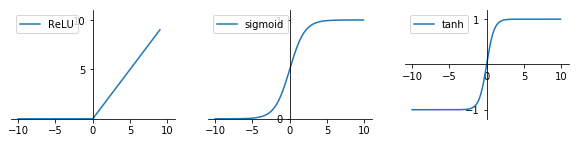

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def ReLU(fig):
    # ReLU 函数
    ax = fig.add_subplot(1, 3, 1)
    x = np.arange(-10, 10)
    y = np.where(x<0, 0, x)

    plt.xlim(-11,11)
    plt.ylim(0,11)

    # 去除顶部与右侧的边框
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    # 将下面的边框移动到 y=0 的位置
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.set_xticks([-10,-5,0,5,10])

    # 将左侧边框移动到 x=0 的位置
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_yticks([5,10])

    ax.plot(x, y, label="ReLU")
    ax.legend()
    
def sigmoid(fig):
    # sigmoid 函数
    ax = fig.add_subplot(1, 3, 2)
    x = np.arange(-10, 10, 0.1)
    y = 1/(1+np.exp(-x))

    plt.xlim(-11,11)
    plt.ylim(0,1.1)

    # 去除顶部与右侧的边框
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    # 将下面的边框移动到 y=0 的位置
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.set_xticks([-10,-5,0,5,10])

    # 将左侧边框移动到 x=0 的位置
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_yticks([0,1.0])

    ax.plot(x, y, label="sigmoid")
    ax.legend()
    
def tanh(fig):
    # tanh 函数
    ax = fig.add_subplot(1, 3, 3)
    x = np.arange(-10, 10, 0.1)
    y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

    plt.xlim(-11,11)
    plt.ylim(-1.2,1.2)

    # 去除顶部与右侧的边框
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    # 将下面的边框移动到 y=0 的位置
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.set_xticks([-10,-5,0,5,10])

    # 将左侧边框移动到 x=0 的位置
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_yticks([-1.0,1.0])

    ax.plot(x, y, label="tanh")
    ax.legend()

if __name__ == "__main__":
    fig = plt.figure(figsize=(10, 2))
    ReLU(fig)
    sigmoid(fig)
    tanh(fig)
    plt.show()

<font face="Courier New">

目前 TensorFlow 提供了7中不同的非线性激活函数, `tf.nn.relu`, `tf.sigmoid` 和 `tf.tanh` 是比较常用的几个. TensorFlow 也支持使用自己定义的激活函数.<br>
下面代码展示了如何通过 TensorFlow 实现"加入偏置项和激活函数的神经网络结构图"中神经网络的前向传播算法.<br>
`a = tf.nn.relu(tf.matmul(x, w1) + biases1)`<br>
`y = tf.nn.relu(tf.matmul(a, w2) + biases2)`

## 2.2 经典损失函数

**分类问题和回归问题是监督学习的两大种类**. 这一小节介绍分类问题和回归问题中使用到的经典损失函数.<br>
分类问题希望解决的是将不同的样本分到事先定义好的类别中.<br>                                                                     